# Explore and Plot the ATL08 data
Plot the ATL08 terrain and canopy data for various ArcticDEM strips

In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (15, 8), 'font.size': 10})

# from shapely.geometry import Polygon, Point
import hvplot
import hvplot.pandas
import geoviews as gv

In [3]:
'''
V:\icesat2\rema\region_01_subantarctic_islands
W:\icesat2\rema\region_19_victoria_land\WV02_20181125_1030010087975700_1030010088694700_2m_lsf
W:\icesat2\rema\region_21_mbl_north\WV03_20181221_1040010045249300_1040010047586D00_2m_lsf
W:/icesat2/rema/region_24_ctam/W1W1_20190213_102001008107AD00_1020010081B45300_2m_lsf
D:\icesat2\rema\region_03_peninsula_south\W3W3_20190415_104001004A5F0500_104001004BC25200_2m_lsf

D:\icesat2\EarthDEM\region_31_alaska_south-x\WV03_20190705_104001004E70E200_104001004D3F5400_2m_lsf
'''

region = 'region_31_alaska_south'#'region_34_alaska_north'#'region_31_alaska_south'#'region_19_victoria_land' #'region_03_peninsula_south'
# folder = f'W:/icesat2/rema/{region}'
# folder = f'D:/icesat2/EarthDEM/{region}'
folder = f'/fs/byo/howat-data5/icesat2/EarthDEM/{region}'
strips = os.listdir(folder)
len(strips)

951

In [4]:
fig_folder = '/home/yadav.111/figs_icesat'
fig_folder

'/home/yadav.111/figs_icesat'

In [5]:
len(strips)

951

In [6]:
# For region 31: strip indices: -31, 301, 402
# interesting: 880
strip = strips[0]

In [7]:
# strip = 'W1W1_20190208_10200100827B7600_1020010082EBD500_2m_lsf'#'W2W3_20190313_103001008F927000_104001004BC46B00_2m_lsf'
# icesat2_path = f'{folder}/{strip}'
icesat2_path = 'test_data'
# os.listdir(icesat2_path)
# outline = gpd.read_file('D:/wspace/icesat2/urmia/outline.shp')
# outline = gpd.read_file('D:/wspace/icesat2/tanana/outline.shp')
# icesat2_path = 'D:/wspace/icesat2/alaska3a'
# icesat2_path = f'/fs/project/howat.4/icesat2/greenland_ATL06'
files = os.listdir(f'{icesat2_path}')
# outline = gpd.read_file(f'{icesat2_path}/strip_outline.shp')
# outline.plot(column='seg_id', alpha=.5), plt.title(f'{strip}');

hdf_files = [f for f in files if f.endswith('.h5') and 'ATL08' in f]
shp_files = [f for f in files if f.endswith('.shp') and 'ATL08' in f]
csv_files = [f for f in files if f.endswith('.csv') and 'ATL08' in f]
# To pick the largest granule for visualization only
sz_list = [os.path.getsize(f'{icesat2_path}/{hdf}') for hdf in hdf_files]
idx = sz_list.index(max(sz_list)) #largest index
print('No of shp files',len(shp_files), len(hdf_files))
# print(outline.area)

fname = shp_files[idx].split('.shp')[0]

# Load ATL08 parsed data
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{fname}.shp', parse_dates=True)
# Pick only the good quality data [verify if zero or one means good]
# df = df[df.q_flag==0]
# gdf = gdf[gdf.q_flag==0]

gtls = list(df.strip.unique())
print(len(df), gtls)
# gv.tile_sources.ESRI * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])

No of shp files 7 7
3584 ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']


In [8]:
gtl = gtls[0]
base = gv.tile_sources.ESRI
gtracks = gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])
terrain_scatter = df[df.strip==gtl].hvplot(y='lat', x='h_te_min', kind='scatter', width=350, height=650, color='brown', s=20, alpha=.9).relabel('terrain') # by='strip', 
canopy_scatter = df[df.strip==gtl].hvplot(y='lat', x='h_max_canopy_abs', kind='scatter', width=350, height=650, color='green', s=10, alpha=.9, title=f'Elevation ({gtl})', xlabel='meters').relabel('canopy')
fig1 = (base*gtracks + terrain_scatter*canopy_scatter).cols(2)
# fig1 = base*gtracks + terrain_scatter*canopy_scatter
# hvplot.save(fig1, f'{fig_folder}/{fname}.png')
fig1

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [Longitude,Latitude]   (strip)
   .Overlay.II :Overlay
      .Scatter.Terrain :Scatter   [h_te_min]   (lat)
      .Scatter.Canopy  :Scatter   [h_max_canopy_abs]   (lat)

In [9]:
# Detour: To save above figure
# hvplot.save(fig1, f'{fig_folder}/{fname}.png')


In [10]:
# df[df.strip==gtl].hvplot.area(x='lat', y=['h_te_min', 'h_max_canopy_abs'], alpha=.5)


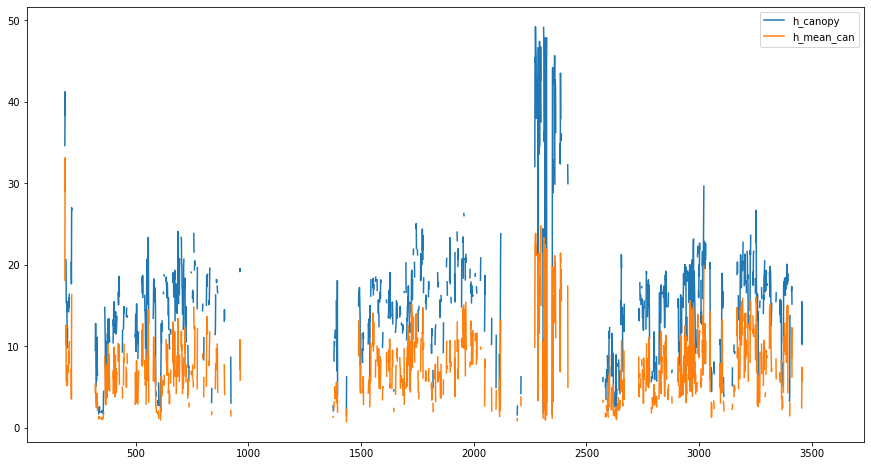

In [11]:
# gdf.h_te_media.plot()
gdf[['h_canopy', 'h_mean_can']].plot(); #error in plotting if no numeric data; ie for areas with no vegetation

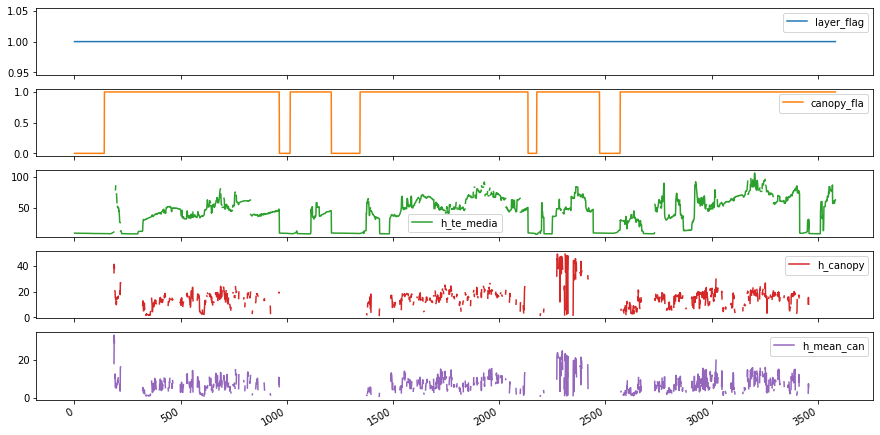

In [12]:
gdf[['layer_flag','canopy_fla', 'h_te_media', 'h_canopy', 'h_mean_can']].plot(subplots=True);

In [13]:
gdf.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_', 'h_te_inter',
       'h_te_max', 'h_te_mean', 'h_te_media', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncer', 'n_te_photo', 'terrain_sl',
       'canopy_fla', 'canopy_ope', 'canopy_rh_', 'centroid_h', 'h_canopy',
       'h_canopy_a', 'h_canopy_q', 'h_canopy_u', 'h_dif_cano', 'h_max_cano',
       'h_max_ca_1', 'h_mean_can', 'h_mean_c_1', 'h_median_c', 'h_median_1',
       'h_min_cano', 'h_min_ca_1', 'landsat_fl', 'landsat_pe', 'n_ca_photo',
       'n_toc_phot', 'toc_roughn', 'strip', 'geometry'],
      dtype='object')

In [16]:
gv.tile_sources.ESRI * gdf.hvplot(geo=True, color='h_te_media', width=500, height=800, alpha=.5, cmap='rainbow')

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (h_te_media)

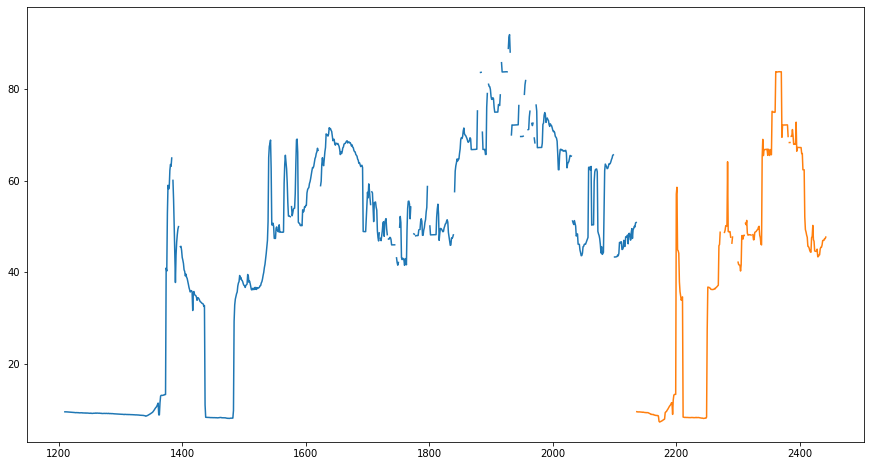

In [17]:
gdf[gdf.strip=='gt2l'].h_te_media.plot()
gdf[gdf.strip=='gt2r'].h_te_media.plot()

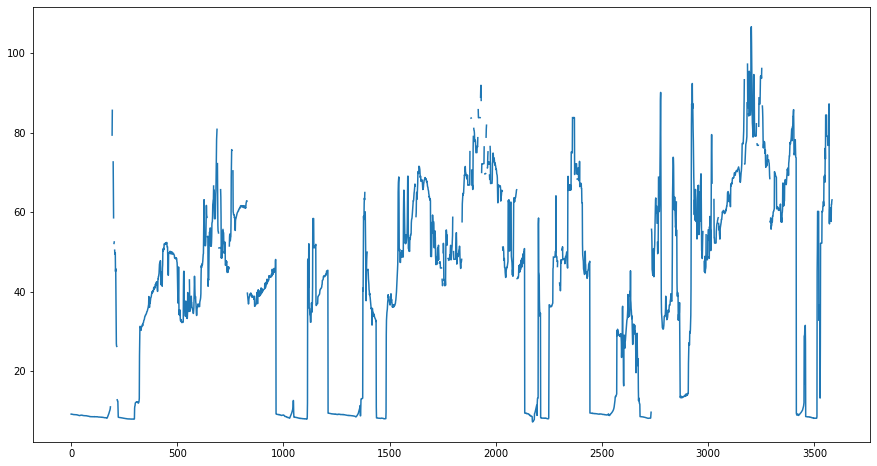

In [18]:
gdf.h_te_media.plot();

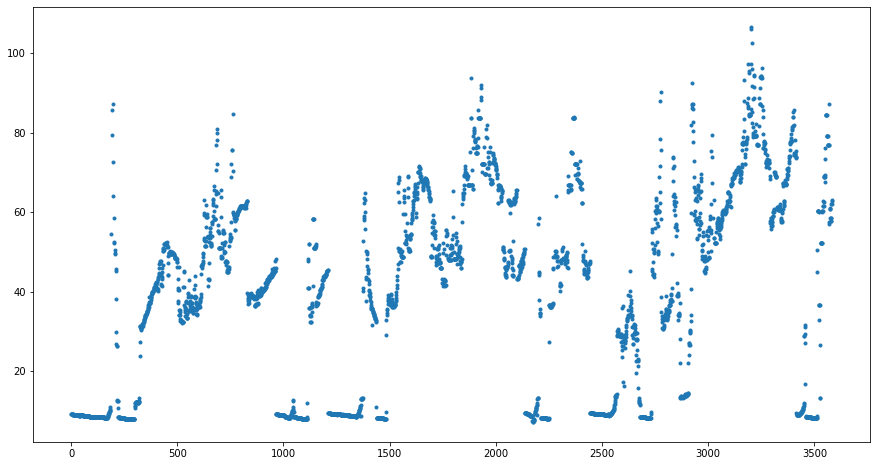

In [29]:
gdf[gdf.layer_flag==1].h_te_media.plot(style='.')

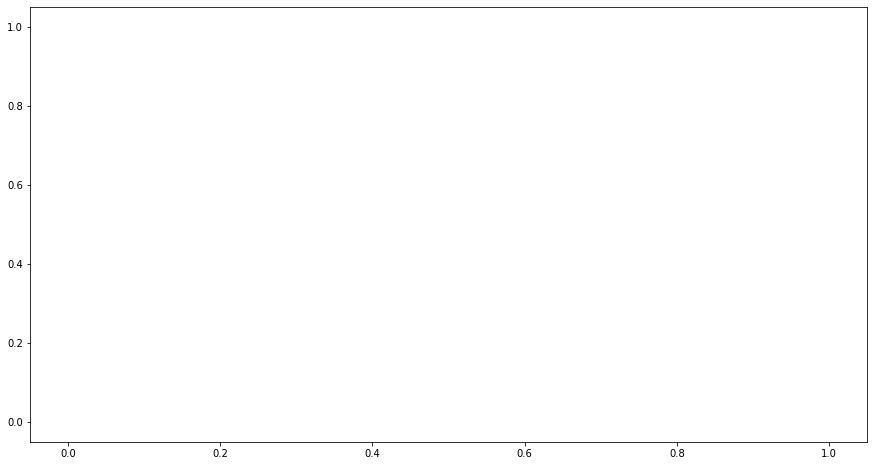

In [31]:
gdf[gdf.layer_flag==0].h_te_media.plot(style='o', alpha=.6)

In [32]:
# gdf['lat'] = gdf.geometry.apply(lambda x:x.y)

In [37]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')

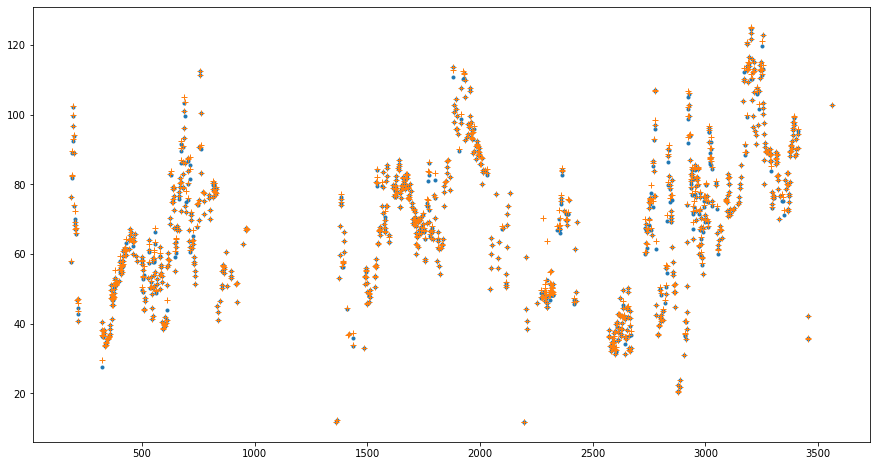

In [40]:
# Error in Canopy-free granules (TypeError: no numeric data to plot)
df.h_canopy_abs.plot(style='.')
df.h_max_canopy_abs.plot(style='+')
# df.h_te_min.plot(style='o');

In [41]:
dfx = gdf.drop(['geometry'], axis=1)
dfx = pd.DataFrame(dfx)
dfx['t_dt'] = pd.to_datetime(dfx.t_dt)
type(dfx)

pandas.core.frame.DataFrame

In [42]:
df['t_dt'] = pd.to_datetime(df.t_dt)


In [43]:
df.head()

lon        lat                    t_dt  layer_flag  h_te_best_fit  \
0 -150.00533  60.980240 2019-07-31 11:29:20.320           1       9.171734   
1 -150.00551  60.981133 2019-07-31 11:29:20.334           1       9.165697   
2 -150.00570  60.982025 2019-07-31 11:29:20.348           1       9.164847   
3 -150.00589  60.982918 2019-07-31 11:29:20.362           1       9.172182   
4 -150.00609  60.983814 2019-07-31 11:29:20.377           1       9.156332   

   h_te_interp  h_te_max  h_te_mean  h_te_median  h_te_min  ...  \
0     9.195848  9.435080   9.186528     9.201656  8.745970  ...   
1     9.175939  9.388001   9.161122     9.176081  8.702844  ...   
2     9.173530  9.420040   9.173231     9.186454  8.661035  ...   
3     9.173621  9.434613   9.168937     9.190130  8.689914  ...   
4     9.171216  9.444901   9.155044     9.175193  8.695684  ...   

   h_median_canopy  h_median_canopy_abs  h_min_canopy  h_min_canopy_abs  \
0              NaN                  NaN           NaN               NaN   
1              NaN                  NaN           NaN               NaN   
2              NaN                  NaN           NaN               NaN   
3              NaN                  NaN           NaN               NaN   
4              NaN                  NaN           NaN               NaN   

   landsat_flag  landsat_perc  n_ca_photons  n_toc_photons  toc_roughness  \
0             0           0.0             0              0            NaN   
1             0           0.0             0              0            NaN   
2             0           0.0             0              0            NaN   
3             0           0.0             0              0            NaN   
4             0           0.0             0              0            NaN   

   strip  
0   gt1l  
1   gt1l  
2   gt1l  
3   gt1l  
4   gt1l  

[5 rows x 39 columns]

In [45]:
df.hvplot(y='h_te_mean', x='t_dt', by='strip', kind='scatter') + df.hvplot(y='h_te_median', x='t_dt', by='strip', kind='scatter')

:Layout
   .NdOverlay.I  :NdOverlay   [strip]
      :Scatter   [t_dt]   (h_te_mean)
   .NdOverlay.II :NdOverlay   [strip]
      :Scatter   [t_dt]   (h_te_median)

In [46]:
(df.h_te_mean - df.h_te_median).hvplot() + df.h_te_median.hvplot()

:Layout
   .Curve.A_0         :Curve   [index]   (0)
   .Curve.H_te_median :Curve   [index]   (h_te_median)

In [55]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')

In [60]:
# gv.tile_sources.StamenTerrainRetina 
(gv.tile_sources.StamenTerrainRetina  * df.hvplot.points('lon', 'lat', geo=True, color='strip', alpha=0.6, width=500, height=800, hover=['strip', 'h_li']) + 
 df[df.strip=='gt1l'].hvplot(y='lat', x='terrain_slope', by='layer_flag', kind='scatter', height=800, alpha=.7)).cols(2)

:Layout
   .Overlay.I   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (strip)
   .NdOverlay.I :NdOverlay   [layer_flag]
      :Scatter   [terrain_slope]   (lat)

In [75]:
(gv.tile_sources.ESRI  * df.hvplot.points('lon', 'lat', geo=True, color='strip', alpha=0.6, width=500, height=800, hover=['strip', 'h_li']) + 
 df.hvplot(y='lat', x='h_te_median', kind='scatter', height=800, alpha=.7)*df.hvplot(y='lat', x='h_canopy_abs', kind='scatter', height=800, alpha=.7)).cols(2)

:Layout
   .Overlay.I  :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [lon,lat]   (strip)
   .Overlay.II :Overlay
      .Scatter.I  :Scatter   [h_te_median]   (lat)
      .Scatter.II :Scatter   [h_canopy_abs]   (lat)

In [76]:
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
df['t_dt'] = pd.to_datetime(dfx.t_dt)


In [77]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')

In [80]:
# gtls = ['gt1l', 'gt1r','gt2l', 'gt2r','gt3l', 'gt3r',]
gtls

['gt2l', 'gt2r', 'gt3l', 'gt3r']

In [82]:
df[df.strip==gtls[-1]][['h_te_best_fit', 'h_te_interp', 'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode']].hvplot() + \
df[df.strip==gtls[-2]][['h_te_best_fit', 'h_te_interp', 'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode']].hvplot()

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [index]   (value)

In [83]:
# df[['h_canopy', 'h_canopy_quad', 'h_dif_canopy']].hvplot(width=800)

In [84]:
df[['h_max_canopy', 'h_mean_canopy', 'h_median_canopy', 'h_min_canopy']].hvplot(width=800)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [85]:
df[['h_max_canopy', 'h_mean_canopy']].hvplot(width=800)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [86]:
df.columns

Index(['lon', 'lat', 't_dt', 'layer_flag', 'h_te_best_fit', 'h_te_interp',
       'h_te_max', 'h_te_mean', 'h_te_median', 'h_te_min', 'h_te_mode',
       'h_te_skew', 'h_te_std', 'h_te_uncertainty', 'n_te_photons',
       'terrain_slope', 'canopy_flag', 'canopy_openness', 'canopy_rh_conf',
       'centroid_height', 'h_canopy', 'h_canopy_abs', 'h_canopy_quad',
       'h_canopy_uncertainty', 'h_dif_canopy', 'h_max_canopy',
       'h_max_canopy_abs', 'h_mean_canopy', 'h_mean_canopy_abs',
       'h_median_canopy', 'h_median_canopy_abs', 'h_min_canopy',
       'h_min_canopy_abs', 'landsat_flag', 'landsat_perc', 'n_ca_photons',
       'n_toc_photons', 'toc_roughness', 'strip'],
      dtype='object')

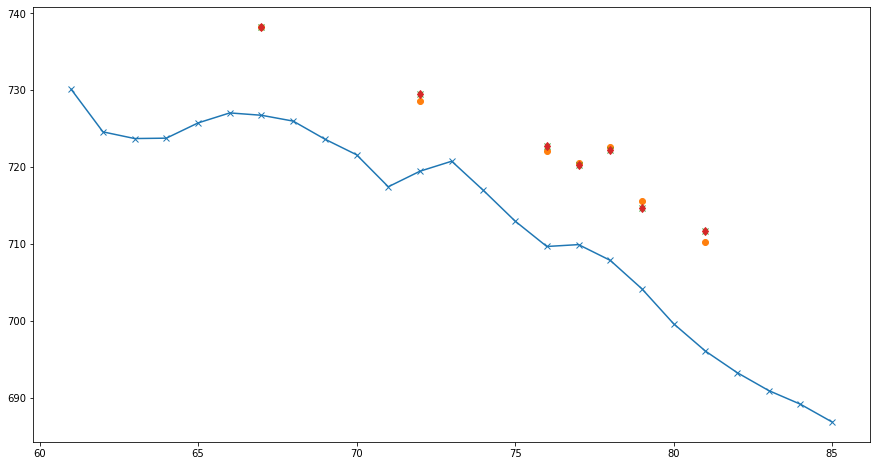

In [89]:
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
df['t_dt'] = pd.to_datetime(dfx.t_dt)
df = df[df.strip=='gt2r']

df.h_te_interp.plot(style='-x')
(df.h_canopy+df.h_te_interp).plot(style='o')
df.h_canopy_abs.plot(style='x')
df.h_max_canopy_abs.plot(style='d')

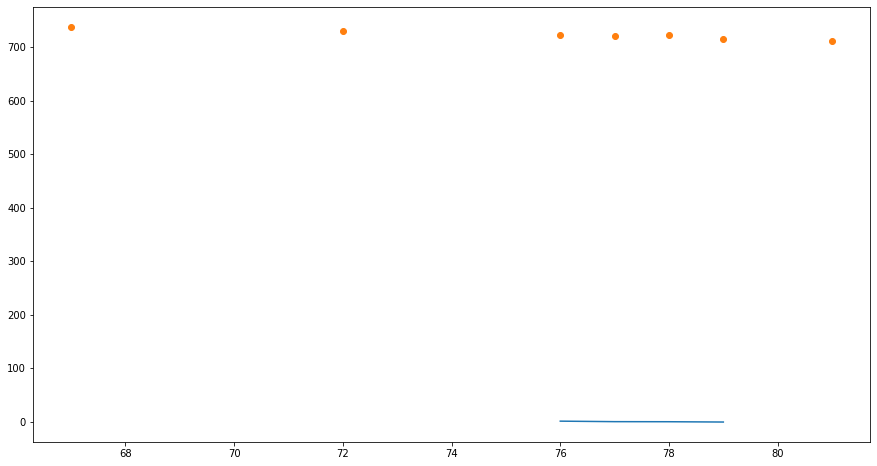

In [90]:
(df.h_canopy_abs - (df.h_canopy+df.h_te_interp)).plot()
df.h_canopy_abs.plot(style='o')

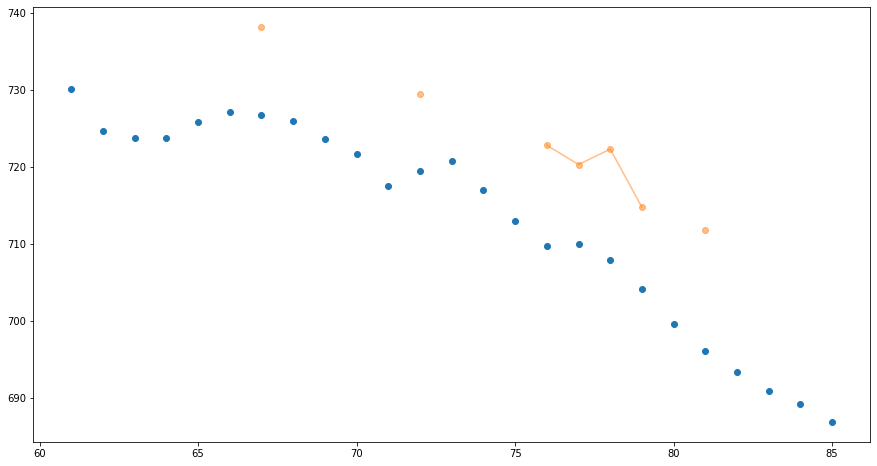

In [91]:
df.h_te_interp.plot(style='o')
df.h_canopy_abs.plot(style='-o', alpha=.5)
